In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# read simulation outputs

# VGS sweep with W={10u,50u,200u,500u} and L=0.13u
filename = '../simulations/ngspice/nmoslv_vgs1.raw'
with open(filename, 'r') as f:
    d1 = f.readlines()

variables = int(d1[5][15:])
print(variables)
points = int(d1[6][12:])
print(points)

var_names = []
for i in range(0,variables):
    var_names.append(d1[8+i])

# VDS sweep with W={10u,50u,200u,500u} and L=0.13u
filename = '../simulations/ngspice/nmoslv_vds1.raw'
with open(filename, 'r') as f:
    d2 = f.readlines()

var2 = int(d2[5][15:])
print(var2)
points2 = int(d2[6][12:])
print(points2)

var2_names = []
for i in range(0,var2):
    var2_names.append(d2[8+i])

# VGS sweep with W={10u,50u,200u,500u} and L=0.5u
filename = '../simulations/ngspice/nmoslv_vgs2.raw'
with open(filename, 'r') as f:
    d3 = f.readlines()

var3 = int(d3[5][15:])
print(var3)
points3 = int(d3[6][12:])
print(points3)

var3_names = []
for i in range(0,var3):
    var3_names.append(d3[8+i])

# VDS sweep with W={10u,50u,200u,500u} and L=0.5u
filename = '../simulations/ngspice/nmoslv_vds2.raw'
with open(filename, 'r') as f:
    d4 = f.readlines()

var4 = int(d4[5][15:])
print(var4)
points4 = int(d4[6][12:])
print(points4)

var4_names = []
for i in range(0,var4):
    var4_names.append(d4[8+i])


# VDS sweep with W={10u,50u,200u,500u} and L=1u
filename = '../simulations/ngspice/nmoslv_vds3.raw'
with open(filename, 'r') as f:
    d6 = f.readlines()

var6 = int(d6[5][15:])
print(var6)
points6 = int(d6[6][12:])
print(points6)

var6_names = []
for i in range(0,var6):
    var6_names.append(d6[8+i])


16
151
3
151
16
151
3
151
3
151


In [2]:
def read_data_from_index(points,variables,d,j,k):
    global vg,ids,vth,gm,gmb,gds,cgg,cgs,cgd,cgb,cdd,css,cgsol,cgdol,cjs,cjd
    for i in range(0,points):
        aux = d[j+(variables+1)*i]
        vg[k].append(float(aux.split()[1]))
        ids[k].append(float(d[j+1+(variables+1)*i]))
        vth[k].append(float(d[j+2+(variables+1)*i]))
        gm[k].append(float(d[j+3+(variables+1)*i]))
        gmb[k].append(float(d[j+4+(variables+1)*i]))
        gds[k].append(float(d[j+5+(variables+1)*i]))
        cgg[k].append(float(d[j+6+(variables+1)*i]))
        cgs[k].append(float(d[j+7+(variables+1)*i]))
        cgd[k].append(float(d[j+8+(variables+1)*i]))
        cgb[k].append(float(d[j+9+(variables+1)*i]))
        cdd[k].append(float(d[j+10+(variables+1)*i]))
        css[k].append(float(d[j+11+(variables+1)*i]))
        cgsol[k].append(float(d[j+12+(variables+1)*i]))
        cgdol[k].append(float(d[j+13+(variables+1)*i]))
        cjs[k].append(float(d[j+14+(variables+1)*i]))
        cjd[k].append(float(d[j+15+(variables+1)*i]))

def read_data2_from_index(points,variables,d,j,k):
    global vg2,ids2,ro
    for i in range(0,points):
        aux = d[j+(variables+1)*i]
        vg2[k].append(float(aux.split()[1]))
        ids2[k].append(float(d[j+1+(variables+1)*i]))
        ro[k].append(float(d[j+2+(variables+1)*i]))

def read_data3_from_index(points,variables,d,j,k):
    global vg3,ids3,vth3,gm3,gmb3,gds3,cgg3,cgs3,cgd3,cgb3,cdd3,css3,cgsol3,cgdol3,cjs3,cjd3
    for i in range(0,points):
        aux = d[j+(variables+1)*i]
        vg3[k].append(float(aux.split()[1]))
        ids3[k].append(float(d[j+1+(variables+1)*i]))
        vth3[k].append(float(d[j+2+(variables+1)*i]))
        gm3[k].append(float(d[j+3+(variables+1)*i]))
        gmb3[k].append(float(d[j+4+(variables+1)*i]))
        gds3[k].append(float(d[j+5+(variables+1)*i]))
        cgg3[k].append(float(d[j+6+(variables+1)*i]))
        cgs3[k].append(float(d[j+7+(variables+1)*i]))
        cgd3[k].append(float(d[j+8+(variables+1)*i]))
        cgb3[k].append(float(d[j+9+(variables+1)*i]))
        cdd3[k].append(float(d[j+10+(variables+1)*i]))
        css3[k].append(float(d[j+11+(variables+1)*i]))
        cgsol3[k].append(float(d[j+12+(variables+1)*i]))
        cgdol3[k].append(float(d[j+13+(variables+1)*i]))
        cjs3[k].append(float(d[j+14+(variables+1)*i]))
        cjd3[k].append(float(d[j+15+(variables+1)*i]))

def read_data4_from_index(points,variables,d,j,k):
    global vg4,ids4,ro4
    for i in range(0,points):
        aux = d[j+(variables+1)*i]
        vg4[k].append(float(aux.split()[1]))
        ids4[k].append(float(d[j+1+(variables+1)*i]))
        ro4[k].append(float(d[j+2+(variables+1)*i]))

def read_data6_from_index(points,variables,d,j,k):
    global vg6,ids6,ro6
    for i in range(0,points):
        aux = d[j+(variables+1)*i]
        vg6[k].append(float(aux.split()[1]))
        ids6[k].append(float(d[j+1+(variables+1)*i]))
        ro6[k].append(float(d[j+2+(variables+1)*i]))

vg = [ [],[],[],[] ]
ids = [ [],[],[],[] ]
vth = [ [],[],[],[] ]
gm = [ [],[],[],[] ]
gmb = [ [],[],[],[] ]
gds = [ [],[],[],[] ]
cgg = [ [],[],[],[] ]
cgs = [ [],[],[],[] ]
cgd = [ [],[],[],[] ]
cgb = [ [],[],[],[] ]
cdd = [ [],[],[],[] ]
css = [ [],[],[],[] ]
cgsol = [ [],[],[],[] ]
cgdol = [ [],[],[],[] ]
cjs = [ [],[],[],[] ]
cjd = [ [],[],[],[] ]

vg2 = [ [],[],[],[] ]
ids2 = [ [],[],[],[] ]
ro = [ [],[],[],[] ]

vg3 = [ [],[],[],[] ]
ids3 = [ [],[],[],[] ]
vth3 = [ [],[],[],[] ]
gm3 = [ [],[],[],[] ]
gmb3 = [ [],[],[],[] ]
gds3 = [ [],[],[],[] ]
cgg3 = [ [],[],[],[] ]
cgs3 = [ [],[],[],[] ]
cgd3 = [ [],[],[],[] ]
cgb3 = [ [],[],[],[] ]
cdd3 = [ [],[],[],[] ]
css3 = [ [],[],[],[] ]
cgsol3 = [ [],[],[],[] ]
cgdol3 = [ [],[],[],[] ]
cjs3 = [ [],[],[],[] ]
cjd3 = [ [],[],[],[] ]

vg4 = [ [],[],[],[] ]
ids4 = [ [],[],[],[] ]
ro4 = [ [],[],[],[] ]

vg6 = [ [],[],[],[] ]
ids6 = [ [],[],[],[] ]
ro6 = [ [],[],[],[] ]

j=[25,2617,5209,7801]
for k in range(0,4):
    read_data_from_index(points,variables,d1,j[k],k)

j=[12,628,1244,1860]
for k in range(0,4):
    read_data2_from_index(points2,var2,d2,j[k],k)

j=[25,2617,5209,7801]
for k in range(0,4):
    read_data3_from_index(points3,var3,d3,j[k],k)

j=[12,628,1244,1860]
for k in range(0,4):
    read_data4_from_index(points4,var4,d4,j[k],k)

j=[12,628,1244,1860]
for k in range(0,4):
    read_data6_from_index(points6,var6,d6,j[k],k)

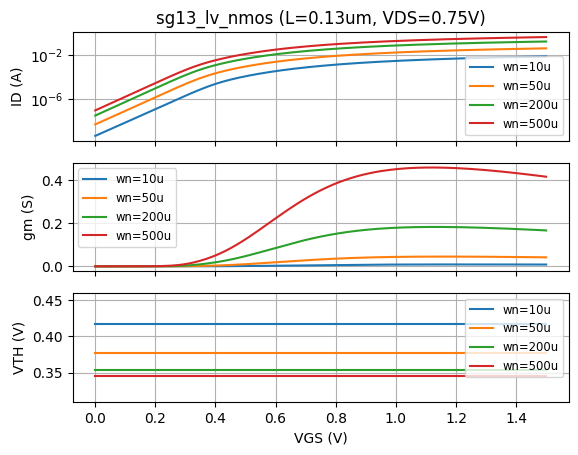

In [3]:
# ID vs VGS
fig, axs = plt.subplots(3,1,sharex='col')

axs[0].set_title('sg13_lv_nmos (L=0.13um, VDS=0.75V)')
axs[0].semilogy(vg[0], ids[0], label='wn=10u')
axs[0].semilogy(vg[1], ids[1], label='wn=50u')
axs[0].semilogy(vg[2], ids[2], label='wn=200u')
axs[0].semilogy(vg[3], ids[3], label='wn=500u')
axs[0].set_ylabel('ID (A)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')
axs[1].plot(vg[0], gm[0], label='wn=10u')
axs[1].plot(vg[1], gm[1], label='wn=50u')
axs[1].plot(vg[2], gm[2], label='wn=200u')
axs[1].plot(vg[3], gm[3], label='wn=500u')
axs[1].set_ylabel('gm (S)')
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')
axs[2].plot(vg[0], vth[0], label='wn=10u')
axs[2].plot(vg[1], vth[1], label='wn=50u')
axs[2].plot(vg[2], vth[2], label='wn=200u')
axs[2].plot(vg[3], vth[3], label='wn=500u')
axs[2].set_ylim(0.31,0.46)
axs[2].set_xlabel('VGS (V)')
axs[2].set_ylabel('VTH (V)')
axs[2].grid()
axs[2].legend(loc='best',fontsize='small')

plt.show()


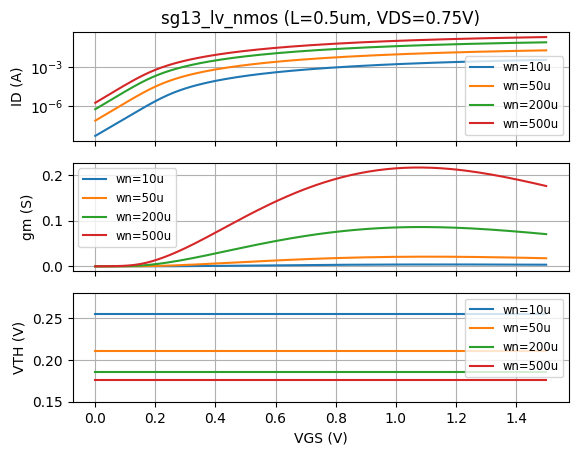

In [4]:
# ID vs VGS
fig, axs = plt.subplots(3,1,sharex='col')

axs[0].set_title('sg13_lv_nmos (L=0.5um, VDS=0.75V)')
axs[0].semilogy(vg3[0], ids3[0], label='wn=10u')
axs[0].semilogy(vg3[1], ids3[1], label='wn=50u')
axs[0].semilogy(vg3[2], ids3[2], label='wn=200u')
axs[0].semilogy(vg3[3], ids3[3], label='wn=500u')
axs[0].set_ylabel('ID (A)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')
axs[1].plot(vg3[0], gm3[0], label='wn=10u')
axs[1].plot(vg3[1], gm3[1], label='wn=50u')
axs[1].plot(vg3[2], gm3[2], label='wn=200u')
axs[1].plot(vg3[3], gm3[3], label='wn=500u')
axs[1].set_ylabel('gm (S)')
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')
axs[2].plot(vg3[0], vth3[0], label='wn=10u')
axs[2].plot(vg3[1], vth3[1], label='wn=50u')
axs[2].plot(vg3[2], vth3[2], label='wn=200u')
axs[2].plot(vg3[3], vth3[3], label='wn=500u')
axs[2].set_ylim(0.15,0.28)
axs[2].set_xlabel('VGS (V)')
axs[2].set_ylabel('VTH (V)')
axs[2].grid()
axs[2].legend(loc='best',fontsize='small')

plt.show()


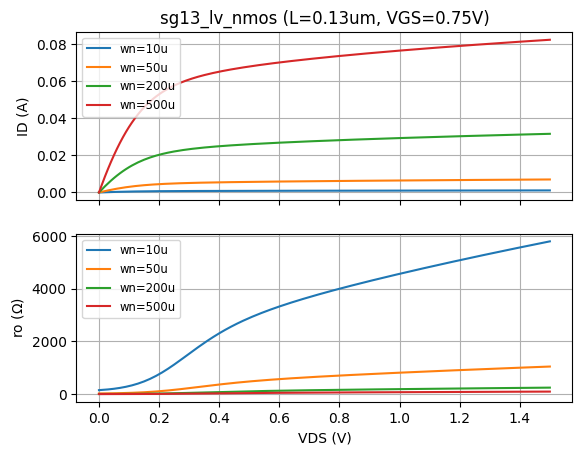

In [5]:
# ID vs VDS
fig, axs = plt.subplots(2,1,sharex='col')

axs[0].set_title('sg13_lv_nmos (L=0.13um, VGS=0.75V)')
axs[0].plot(vg2[0], ids2[0], label='wn=10u')
axs[0].plot(vg2[1], ids2[1], label='wn=50u')
axs[0].plot(vg2[2], ids2[2], label='wn=200u')
axs[0].plot(vg2[3], ids2[3], label='wn=500u')
axs[0].set_ylabel('ID (A)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')
axs[1].plot(vg2[0], ro[0], label='wn=10u')
axs[1].plot(vg2[1], ro[1], label='wn=50u')
axs[1].plot(vg2[2], ro[2], label='wn=200u')
axs[1].plot(vg2[3], ro[3], label='wn=500u')
axs[1].set_xlabel('VDS (V)')
axs[1].set_ylabel(r'ro ($\Omega$)')
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')

plt.show()


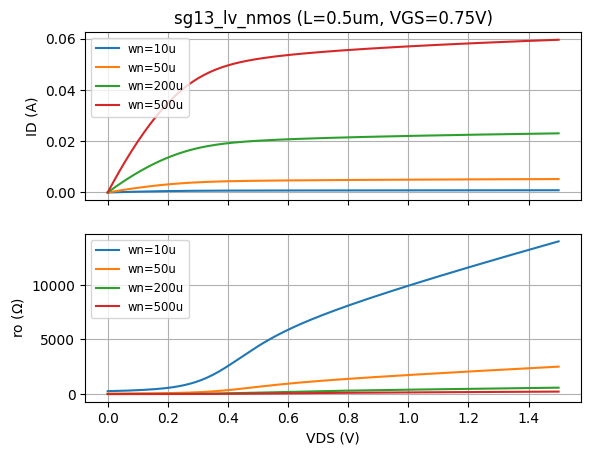

In [6]:
# ID vs VDS
fig, axs = plt.subplots(2,1,sharex='col')

axs[0].set_title('sg13_lv_nmos (L=0.5um, VGS=0.75V)')
axs[0].plot(vg4[0], ids4[0], label='wn=10u')
axs[0].plot(vg4[1], ids4[1], label='wn=50u')
axs[0].plot(vg4[2], ids4[2], label='wn=200u')
axs[0].plot(vg4[3], ids4[3], label='wn=500u')
axs[0].set_ylabel('ID (A)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')
axs[1].plot(vg4[0], ro4[0], label='wn=10u')
axs[1].plot(vg4[1], ro4[1], label='wn=50u')
axs[1].plot(vg4[2], ro4[2], label='wn=200u')
axs[1].plot(vg4[3], ro4[3], label='wn=500u')
axs[1].set_xlabel('VDS (V)')
axs[1].set_ylabel(r'ro ($\Omega$)')
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')

plt.show()


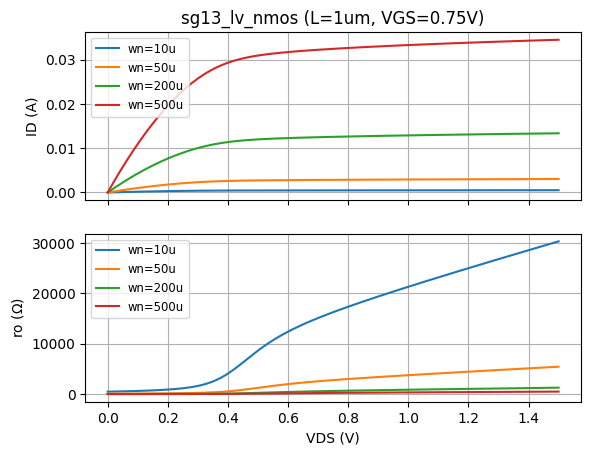

In [7]:
# ID vs VDS
fig, axs = plt.subplots(2,1,sharex='col')

axs[0].set_title('sg13_lv_nmos (L=1um, VGS=0.75V)')
axs[0].plot(vg6[0], ids6[0], label='wn=10u')
axs[0].plot(vg6[1], ids6[1], label='wn=50u')
axs[0].plot(vg6[2], ids6[2], label='wn=200u')
axs[0].plot(vg6[3], ids6[3], label='wn=500u')
axs[0].set_ylabel('ID (A)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')
axs[1].plot(vg6[0], ro6[0], label='wn=10u')
axs[1].plot(vg6[1], ro6[1], label='wn=50u')
axs[1].plot(vg6[2], ro6[2], label='wn=200u')
axs[1].plot(vg6[3], ro6[3], label='wn=500u')
axs[1].set_xlabel('VDS (V)')
axs[1].set_ylabel(r'ro ($\Omega$)')
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')

plt.show()


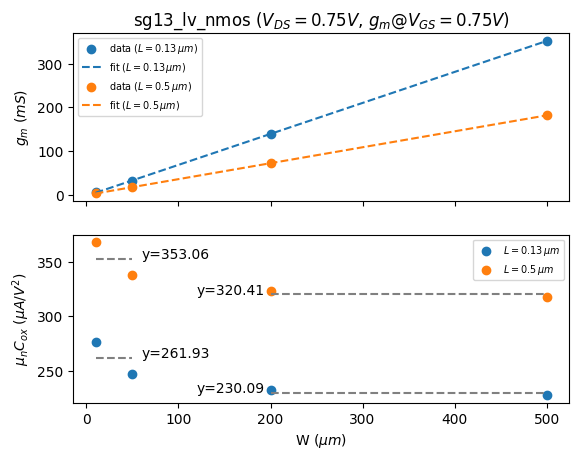

In [9]:
# Create a gm vs width plot to estimate "unCox" value

# Interpolating gm values
w = [10e-6,50e-6,200e-6,500e-6]
vgval = 0.75

gmval = []
for i in range(0,4):
    gmval.append(np.interp(vgval,vg[i],gm[i]))

gmval3 = []
for i in range(0,4):
    gmval3.append(np.interp(vgval,vg3[i],gm3[i]))

# Fitting
fit = stats.linregress(w, gmval)
fit3 = stats.linregress(w, gmval3)

# Estimating unCox
length = 0.13e-6
uncox = []
for i in range(0,4):
    uncox.append(fit.slope*length/(vgval-np.interp(vgval,vg[i],vth[i])))

length3 = 0.5e-6
uncox3 = []
for i in range(0,4):
    uncox3.append(fit3.slope*length3/(vgval-np.interp(vgval,vg3[i],vth3[i])))

fig, axs = plt.subplots(2,1,sharex='col')

axs[0].set_title(r'sg13_lv_nmos ($V_{DS}=0.75V$, $g_m@V_{GS}=0.75V$)')
axs[0].scatter(np.array(w)*1e6, np.array(gmval)*1e3, label=r'data ($L=0.13\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit.intercept + fit.slope*np.array(w))*1e3, '--', label=r'fit ($L=0.13\,\mu m$)')
axs[0].scatter(np.array(w)*1e6, np.array(gmval3)*1e3, label=r'data ($L=0.5\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit3.intercept + fit3.slope*np.array(w))*1e3, '--', label=r'fit ($L=0.5\,\mu m$)')
axs[0].set_ylabel(r'$g_m ~(mS)$')
axs[0].legend(loc='best',fontsize='x-small')

# Fitting
uncoxvala = (uncox[0] + uncox[1])/2
uncoxvalb = (uncox[2] + uncox[3])/2
uncoxval3a = (uncox3[0] + uncox3[1])/2
uncoxval3b = (uncox3[2] + uncox3[3])/2

axs[1].scatter(np.array(w)*1e6, np.array(uncox)*1e6, label=r'$L=0.13\,\mu m$')
axs[1].plot(np.array(w[0:2])*1e6, uncoxvala*1e6*np.array([1,1]), '--', color='gray')
axs[1].plot(np.array(w[2:4])*1e6, uncoxvalb*1e6*np.array([1,1]), '--', color='gray')
axs[1].scatter(np.array(w)*1e6, np.array(uncox3)*1e6, label=r'$L=0.5\,\mu m$')
axs[1].plot(np.array(w[0:2])*1e6, uncoxval3a*1e6*np.array([1,1]), '--', color='gray')
axs[1].plot(np.array(w[2:4])*1e6, uncoxval3b*1e6*np.array([1,1]), '--', color='gray')
axs[1].set_xlabel(r'W ($\mu m$)')
axs[1].set_ylabel(r'$\mu_nC_{ox} ~(\mu A/V^2)$')
#axs[1].set_ylim(145,265)
axs[1].text(60,uncoxvala*1e6,'y='+str(round(uncoxvala*1e6,2)))
axs[1].text(120,uncoxvalb*1e6,'y='+str(round(uncoxvalb*1e6,2)))
axs[1].text(60,uncoxval3a*1e6,'y='+str(round(uncoxval3a*1e6,2)))
axs[1].text(120,uncoxval3b*1e6,'y='+str(round(uncoxval3b*1e6,2)))

axs[1].legend(loc='best',fontsize='x-small')

plt.show()

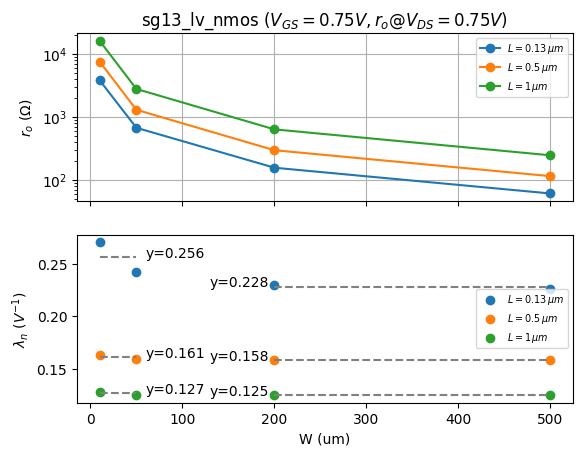

In [28]:
# Create a ro vs width plot to estimate "lambda-n" value

# Interpolating ro values
w = [10e-6,50e-6,200e-6,500e-6]
vgval = 0.75
roval = []
for i in range(0,4):
    roval.append(np.interp(vgval,vg2[i],ro[i]))

roval4 = []
for i in range(0,4):
    roval4.append(np.interp(vgval,vg4[i],ro4[i]))

roval6 = []
for i in range(0,4):
    roval6.append(np.interp(vgval,vg6[i],ro6[i]))

# Estimating lambda-n
length = 0.13e-6
lambdan = []
for i in range(0,4):
    lambdan.append(1/(np.interp(vgval,vg2[i],ids2[i])*np.interp(vgval,vg2[i],ro[i])))

length4 = 0.5e-6
lambdan4 = []
for i in range(0,4):
    lambdan4.append(1/(np.interp(vgval,vg4[i],ids4[i])*np.interp(vgval,vg4[i],ro4[i])))

length6 = 0.5e-6
lambdan6 = []
for i in range(0,4):
    lambdan6.append(1/(np.interp(vgval,vg6[i],ids6[i])*np.interp(vgval,vg6[i],ro6[i])))

# Fitting
fit = stats.linregress(w, lambdan)
fit4 = stats.linregress(w, lambdan4)
fit6 = stats.linregress(w, lambdan6)

fig, axs = plt.subplots(2,1,sharex='col')

axs[0].set_title(r'sg13_lv_nmos ($V_{GS}=0.75V, r_o@V_{DS}=0.75V$)')
axs[0].plot(np.array(w)*1e6, np.array(roval),'o-', label=r'$L=0.13\,\mu m$')
axs[0].plot(np.array(w)*1e6, np.array(roval4),'o-', label=r'$L=0.5\,\mu m$')
axs[0].plot(np.array(w)*1e6, np.array(roval6),'o-', label=r'$L=1\,\mu m$')
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$r_o ~(\Omega$)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='x-small')

# Fitting
lambdana = (lambdan[0] + lambdan[1])/2
lambdanb = (lambdan[2] + lambdan[3])/2
lambdan4a = (lambdan4[0] + lambdan4[1])/2
lambdan4b = (lambdan4[2] + lambdan4[3])/2
lambdan6a = (lambdan6[0] + lambdan6[1])/2
lambdan6b = (lambdan6[2] + lambdan6[3])/2

axs[1].scatter(np.array(w)*1e6, lambdan, label=r'$L=0.13\,\mu m$')
# axs[1].plot(np.array(w)*1e6, fit.intercept + fit.slope*np.array(w), '--', label=r'fit ($L=0.13\,\mu m$)')
axs[1].plot(np.array(w[0:2])*1e6, lambdana*np.array([1,1]), '--', color='gray')
axs[1].plot(np.array(w[2:4])*1e6, lambdanb*np.array([1,1]), '--', color='gray')
axs[1].scatter(np.array(w)*1e6, lambdan4, label=r'$L=0.5\,\mu m$')
# axs[1].plot(np.array(w)*1e6, fit4.intercept + fit4.slope*np.array(w), '--', label=r'fit ($L=0.5\,\mu m$)')
axs[1].plot(np.array(w[0:2])*1e6, lambdan4a*np.array([1,1]), '--', color='gray')
axs[1].plot(np.array(w[2:4])*1e6, lambdan4b*np.array([1,1]), '--', color='gray')
axs[1].scatter(np.array(w)*1e6, lambdan6, label=r'$L=1\,\mu m$')
# axs[1].plot(np.array(w)*1e6, fit6.intercept + fit6.slope*np.array(w), '--', label=r'fit ($L=1\,\mu m$)')
axs[1].plot(np.array(w[0:2])*1e6, lambdan6a*np.array([1,1]), '--', color='gray')
axs[1].plot(np.array(w[2:4])*1e6, lambdan6b*np.array([1,1]), '--', color='gray')
axs[1].set_xlabel('W (um)')
axs[1].set_ylabel(r'$\lambda_n ~(V^{-1})$')
#axs[1].set_ylim(0.07,0.205)

axs[1].text(60,lambdana,'y='+str(round(lambdana,3)))
axs[1].text(130,lambdanb,'y='+str(round(lambdanb,3)))
axs[1].text(60,lambdan4a,'y='+str(round(lambdan4a,3)))
axs[1].text(130,lambdan4b,'y='+str(round(lambdan4b,3)))
axs[1].text(60,lambdan6a,'y='+str(round(lambdan6a,3)))
axs[1].text(130,lambdan6b,'y='+str(round(lambdan6b,3)))

axs[1].legend(loc='best',fontsize='x-small')

plt.show()

In [12]:
# Estimate capacitances

cgs_total_1 = np.abs(cgs) + np.abs(cgsol)
cgd_total_1 = np.abs(cgd) + np.abs(cgdol)
cdb_total_1 = cjd
csb_total_1 = cjs
cgs_total_3 = np.abs(cgs3) + np.abs(cgsol3)
cgd_total_3 = np.abs(cgd3) + np.abs(cgdol3)
cdb_total_3 = cjd3
csb_total_3 = cjs3

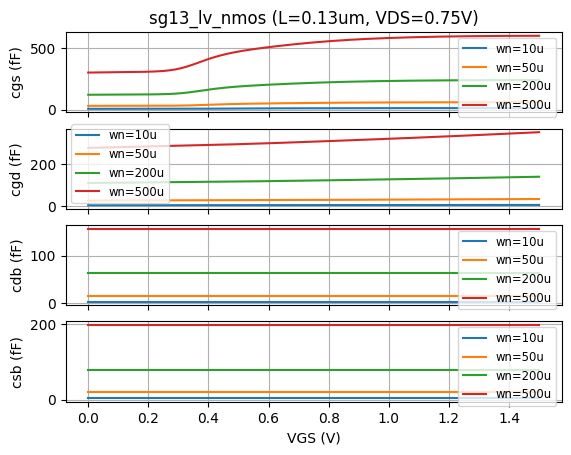

In [13]:
# Caps vs VGS
fig, axs = plt.subplots(4,1,sharex='col')

axs[0].set_title('sg13_lv_nmos (L=0.13um, VDS=0.75V)')

axs[0].plot(vg[0], np.array(cgs_total_1[0])*1e15, label='wn=10u')
axs[0].plot(vg[1], np.array(cgs_total_1[1])*1e15, label='wn=50u')
axs[0].plot(vg[2], np.array(cgs_total_1[2])*1e15, label='wn=200u')
axs[0].plot(vg[3], np.array(cgs_total_1[3])*1e15, label='wn=500u')
axs[0].set_ylabel('cgs (fF)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')

axs[1].plot(vg[0], np.array(cgd_total_1[0])*1e15, label='wn=10u')
axs[1].plot(vg[1], np.array(cgd_total_1[1])*1e15, label='wn=50u')
axs[1].plot(vg[2], np.array(cgd_total_1[2])*1e15, label='wn=200u')
axs[1].plot(vg[3], np.array(cgd_total_1[3])*1e15, label='wn=500u')
axs[1].set_ylabel('cgd (fF)')
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')

axs[2].plot(vg[0], np.array(cdb_total_1[0])*1e15, label='wn=10u')
axs[2].plot(vg[1], np.array(cdb_total_1[1])*1e15, label='wn=50u')
axs[2].plot(vg[2], np.array(cdb_total_1[2])*1e15, label='wn=200u')
axs[2].plot(vg[3], np.array(cdb_total_1[3])*1e15, label='wn=500u')
axs[2].set_ylabel('cdb (fF)')
axs[2].grid()
axs[2].legend(loc='best',fontsize='small')

axs[3].plot(vg[0], np.array(csb_total_1[0])*1e15, label='wn=10u')
axs[3].plot(vg[1], np.array(csb_total_1[1])*1e15, label='wn=50u')
axs[3].plot(vg[2], np.array(csb_total_1[2])*1e15, label='wn=200u')
axs[3].plot(vg[3], np.array(csb_total_1[3])*1e15, label='wn=500u')
axs[3].set_xlabel('VGS (V)')
axs[3].set_ylabel('csb (fF)')
axs[3].grid()
axs[3].legend(loc='best',fontsize='small')

plt.show()

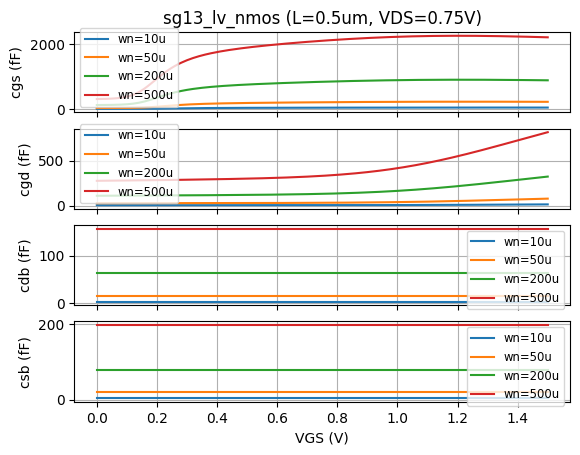

In [14]:
# Caps vs VGS
fig, axs = plt.subplots(4,1,sharex='col')

axs[0].set_title('sg13_lv_nmos (L=0.5um, VDS=0.75V)')

axs[0].plot(vg[0], np.array(cgs_total_3[0])*1e15, label='wn=10u')
axs[0].plot(vg[1], np.array(cgs_total_3[1])*1e15, label='wn=50u')
axs[0].plot(vg[2], np.array(cgs_total_3[2])*1e15, label='wn=200u')
axs[0].plot(vg[3], np.array(cgs_total_3[3])*1e15, label='wn=500u')
axs[0].set_ylabel('cgs (fF)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')

axs[1].plot(vg[0], np.array(cgd_total_3[0])*1e15, label='wn=10u')
axs[1].plot(vg[1], np.array(cgd_total_3[1])*1e15, label='wn=50u')
axs[1].plot(vg[2], np.array(cgd_total_3[2])*1e15, label='wn=200u')
axs[1].plot(vg[3], np.array(cgd_total_3[3])*1e15, label='wn=500u')
axs[1].set_ylabel('cgd (fF)')
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')

axs[2].plot(vg[0], np.array(cdb_total_3[0])*1e15, label='wn=10u')
axs[2].plot(vg[1], np.array(cdb_total_3[1])*1e15, label='wn=50u')
axs[2].plot(vg[2], np.array(cdb_total_3[2])*1e15, label='wn=200u')
axs[2].plot(vg[3], np.array(cdb_total_3[3])*1e15, label='wn=500u')
axs[2].set_ylabel('cdb (fF)')
axs[2].grid()
axs[2].legend(loc='best',fontsize='small')

axs[3].plot(vg[0], np.array(csb_total_3[0])*1e15, label='wn=10u')
axs[3].plot(vg[1], np.array(csb_total_3[1])*1e15, label='wn=50u')
axs[3].plot(vg[2], np.array(csb_total_3[2])*1e15, label='wn=200u')
axs[3].plot(vg[3], np.array(csb_total_3[3])*1e15, label='wn=500u')
axs[3].set_xlabel('VGS (V)')
axs[3].set_ylabel('csb (fF)')
axs[3].grid()
axs[3].legend(loc='best',fontsize='small')

plt.show()

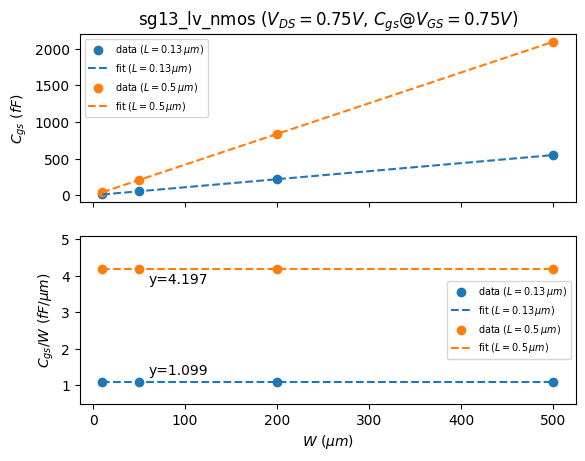

In [15]:
# Create a capacitance vs width plot to estimate "cap_per_um-width" value

# Interpolating capacitances values
w = [10e-6,50e-6,200e-6,500e-6]
vgval = 0.75

cgsval1 = []
for i in range(0,4):
    cgsval1.append(np.interp(vgval,vg[i],cgs_total_1[i]))

cgsval3 = []
for i in range(0,4):
    cgsval3.append(np.interp(vgval,vg3[i],cgs_total_3[i]))

# Fitting
fit1 = stats.linregress(w, cgsval1)
fit3 = stats.linregress(w, cgsval3)

# Estimating cgs-per-um
cgsperw1 = []
for i in range(0,4):
    cgsperw1.append(fit1.slope)

cgsperw3 = []
for i in range(0,4):
    cgsperw3.append(fit3.slope)



fig, axs = plt.subplots(2,1,sharex='col')

axs[0].set_title(r'sg13_lv_nmos ($V_{DS}=0.75V$, $C_{gs}@V_{GS}=0.75V$)')

axs[0].scatter(np.array(w)*1e6, np.array(cgsval1)*1e15, label=r'data ($L=0.13\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit1.intercept + fit1.slope*np.array(w))*1e15, '--', label=r'fit ($L=0.13\,\mu m$)')
axs[0].scatter(np.array(w)*1e6, np.array(cgsval3)*1e15, label=r'data ($L=0.5\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit3.intercept + fit3.slope*np.array(w))*1e15, '--', label=r'fit ($L=0.5\,\mu m$)')
axs[0].set_ylabel(r'$C_{gs} ~(fF)$')
axs[0].legend(loc='best',fontsize='x-small')

# Fitting
fit1 = stats.linregress(w, cgsperw1)
fit3 = stats.linregress(w, cgsperw3)

axs[1].scatter(np.array(w)*1e6, np.array(cgsperw1)*1e15*1e-6, label=r'data ($L=0.13\,\mu m$)')
axs[1].plot(np.array(w)*1e6, (fit1.intercept + fit1.slope*np.array(w))*1e15*1e-6, '--', label=r'fit ($L=0.13\,\mu m$)')
axs[1].scatter(np.array(w)*1e6, np.array(cgsperw3)*1e15*1e-6, label=r'data ($L=0.5\,\mu m$)')
axs[1].plot(np.array(w)*1e6, (fit3.intercept + fit3.slope*np.array(w))*1e15*1e-6, '--', label=r'fit ($L=0.5\,\mu m$)')
axs[1].set_xlabel(r'$W ~(\mu m)$')
axs[1].set_ylabel(r'$C_{gs}/W ~(fF/\mu m)$')
axs[1].set_ylim(0.5,5.1)
axs[1].legend(loc='best',fontsize='x-small')

axs[1].text(60,fit1.intercept*1e15*1e-6+0.2,'y='+str(round(fit1.intercept*1e15*1e-6,3)))
axs[1].text(60,fit3.intercept*1e15*1e-6-0.4,'y='+str(round(fit3.intercept*1e15*1e-6,3)))

plt.show()

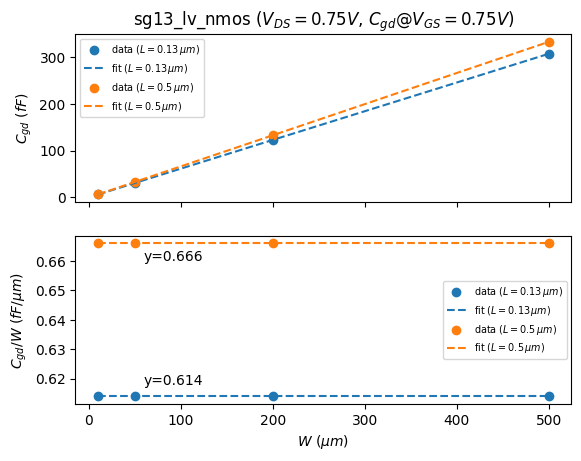

In [25]:
# Create a capacitance vs width plot to estimate "cap_per_um-width" value

# Interpolating capacitances values
w = [10e-6,50e-6,200e-6,500e-6]
vgval = 0.75

cgdval1 = []
for i in range(0,4):
    cgdval1.append(np.interp(vgval,vg[i],cgd_total_1[i]))

cgdval3 = []
for i in range(0,4):
    cgdval3.append(np.interp(vgval,vg3[i],cgd_total_3[i]))

# Fitting
fit1 = stats.linregress(w, cgdval1)
fit3 = stats.linregress(w, cgdval3)

# Estimating cgs-per-um
cgdperw1 = []
for i in range(0,4):
    cgdperw1.append(fit1.slope)

cgdperw3 = []
for i in range(0,4):
    cgdperw3.append(fit3.slope)



fig, axs = plt.subplots(2,1,sharex='col')

axs[0].set_title(r'sg13_lv_nmos ($V_{DS}=0.75V$, $C_{gd}@V_{GS}=0.75V$)')

axs[0].scatter(np.array(w)*1e6, np.array(cgdval1)*1e15, label=r'data ($L=0.13\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit1.intercept + fit1.slope*np.array(w))*1e15, '--', label=r'fit ($L=0.13\,\mu m$)')
axs[0].scatter(np.array(w)*1e6, np.array(cgdval3)*1e15, label=r'data ($L=0.5\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit3.intercept + fit3.slope*np.array(w))*1e15, '--', label=r'fit ($L=0.5\,\mu m$)')
axs[0].set_ylabel(r'$C_{gd} ~(fF)$')
axs[0].legend(loc='best',fontsize='x-small')

# Fitting
fit1 = stats.linregress(w, cgdperw1)
fit3 = stats.linregress(w, cgdperw3)

axs[1].scatter(np.array(w)*1e6, np.array(cgdperw1)*1e15*1e-6, label=r'data ($L=0.13\,\mu m$)')
axs[1].plot(np.array(w)*1e6, (fit1.intercept + fit1.slope*np.array(w))*1e15*1e-6, '--', label=r'fit ($L=0.13\,\mu m$)')
axs[1].scatter(np.array(w)*1e6, np.array(cgdperw3)*1e15*1e-6, label=r'data ($L=0.5\,\mu m$)')
axs[1].plot(np.array(w)*1e6, (fit3.intercept + fit3.slope*np.array(w))*1e15*1e-6, '--', label=r'fit ($L=0.5\,\mu m$)')
axs[1].set_xlabel(r'$W ~(\mu m)$')
axs[1].set_ylabel(r'$C_{gd}/W ~(fF/\mu m)$')
#axs[1].set_ylim(0.6,1)
axs[1].legend(loc='best',fontsize='x-small')

axs[1].text(60,fit1.intercept*1e15*1e-6+0.004,'y='+str(round(fit1.intercept*1e15*1e-6,3)))
axs[1].text(60,fit3.intercept*1e15*1e-6-0.006,'y='+str(round(fit3.intercept*1e15*1e-6,3)))

plt.show()

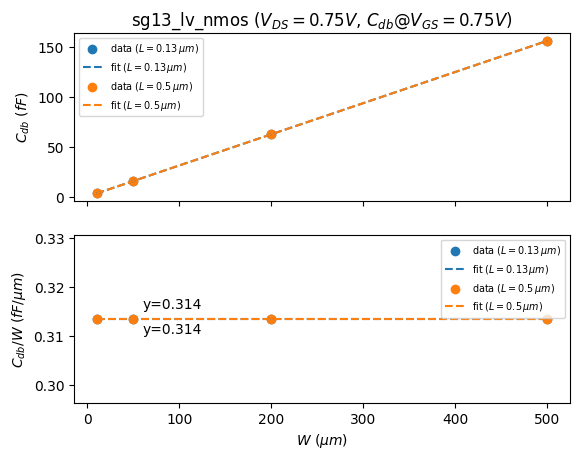

In [26]:
# Create a capacitance vs width plot to estimate "cap_per_um-width" value

# Interpolating capacitances values
w = [10e-6,50e-6,200e-6,500e-6]
vgval = 0.75

cdbval1 = []
for i in range(0,4):
    cdbval1.append(np.interp(vgval,vg[i],cdb_total_1[i]))

cdbval3 = []
for i in range(0,4):
    cdbval3.append(np.interp(vgval,vg3[i],cdb_total_3[i]))

# Fitting
fit1 = stats.linregress(w, cdbval1)
fit3 = stats.linregress(w, cdbval3)

# Estimating cgs-per-um
cdbperw1 = []
for i in range(0,4):
    cdbperw1.append(fit1.slope)

cdbperw3 = []
for i in range(0,4):
    cdbperw3.append(fit3.slope)



fig, axs = plt.subplots(2,1,sharex='col')

axs[0].set_title(r'sg13_lv_nmos ($V_{DS}=0.75V$, $C_{db}@V_{GS}=0.75V$)')

axs[0].scatter(np.array(w)*1e6, np.array(cdbval1)*1e15, label=r'data ($L=0.13\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit1.intercept + fit1.slope*np.array(w))*1e15, '--', label=r'fit ($L=0.13\,\mu m$)')
axs[0].scatter(np.array(w)*1e6, np.array(cdbval3)*1e15, label=r'data ($L=0.5\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit3.intercept + fit3.slope*np.array(w))*1e15, '--', label=r'fit ($L=0.5\,\mu m$)')
axs[0].set_ylabel(r'$C_{db} ~(fF)$')
axs[0].legend(loc='best',fontsize='x-small')

# Fitting
fit1 = stats.linregress(w, cdbperw1)
fit3 = stats.linregress(w, cdbperw3)

axs[1].scatter(np.array(w)*1e6, np.array(cdbperw1)*1e15*1e-6, label=r'data ($L=0.13\,\mu m$)')
axs[1].plot(np.array(w)*1e6, (fit1.intercept + fit1.slope*np.array(w))*1e15*1e-6, '--', label=r'fit ($L=0.13\,\mu m$)')
axs[1].scatter(np.array(w)*1e6, np.array(cdbperw3)*1e15*1e-6, label=r'data ($L=0.5\,\mu m$)')
axs[1].plot(np.array(w)*1e6, (fit3.intercept + fit3.slope*np.array(w))*1e15*1e-6, '--', label=r'fit ($L=0.5\,\mu m$)')
axs[1].set_xlabel(r'$W ~(\mu m)$')
axs[1].set_ylabel(r'$C_{db}/W ~(fF/\mu m)$')
axs[1].legend(loc='best',fontsize='x-small')

axs[1].text(60,fit1.intercept*1e15*1e-6+0.002,'y='+str(round(fit1.intercept*1e15*1e-6,3)))
axs[1].text(60,fit3.intercept*1e15*1e-6-0.003,'y='+str(round(fit3.intercept*1e15*1e-6,3)))

plt.show()

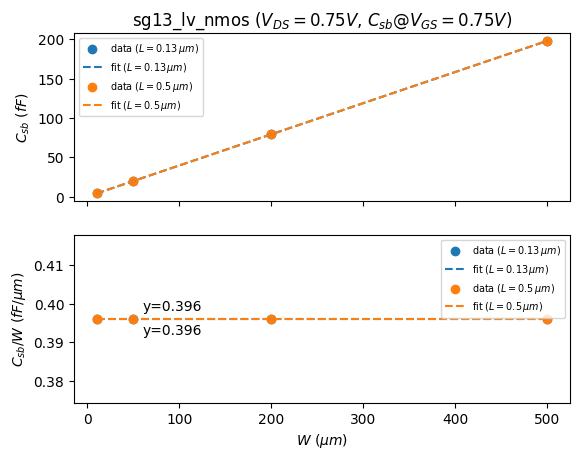

In [27]:
# Create a capacitance vs width plot to estimate "cap_per_um-width" value

# Interpolating capacitances values
w = [10e-6,50e-6,200e-6,500e-6]
vgval = 0.75

csbval1 = []
for i in range(0,4):
    csbval1.append(np.interp(vgval,vg[i],csb_total_1[i]))

csbval3 = []
for i in range(0,4):
    csbval3.append(np.interp(vgval,vg3[i],csb_total_3[i]))

# Fitting
fit1 = stats.linregress(w, csbval1)
fit3 = stats.linregress(w, csbval3)

# Estimating cgs-per-um
csbperw1 = []
for i in range(0,4):
    csbperw1.append(fit1.slope)

csbperw3 = []
for i in range(0,4):
    csbperw3.append(fit3.slope)



fig, axs = plt.subplots(2,1,sharex='col')

axs[0].set_title(r'sg13_lv_nmos ($V_{DS}=0.75V$, $C_{sb}@V_{GS}=0.75V$)')

axs[0].scatter(np.array(w)*1e6, np.array(csbval1)*1e15, label=r'data ($L=0.13\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit1.intercept + fit1.slope*np.array(w))*1e15, '--', label=r'fit ($L=0.13\,\mu m$)')
axs[0].scatter(np.array(w)*1e6, np.array(csbval3)*1e15, label=r'data ($L=0.5\,\mu m$)')
axs[0].plot(np.array(w)*1e6, (fit3.intercept + fit3.slope*np.array(w))*1e15, '--', label=r'fit ($L=0.5\,\mu m$)')
axs[0].set_ylabel(r'$C_{sb} ~(fF)$')
axs[0].legend(loc='best',fontsize='x-small')

# Fitting
fit1 = stats.linregress(w, csbperw1)
fit3 = stats.linregress(w, csbperw3)

axs[1].scatter(np.array(w)*1e6, np.array(csbperw1)*1e15*1e-6, label=r'data ($L=0.13\,\mu m$)')
axs[1].plot(np.array(w)*1e6, (fit1.intercept + fit1.slope*np.array(w))*1e15*1e-6, '--', label=r'fit ($L=0.13\,\mu m$)')
axs[1].scatter(np.array(w)*1e6, np.array(csbperw3)*1e15*1e-6, label=r'data ($L=0.5\,\mu m$)')
axs[1].plot(np.array(w)*1e6, (fit3.intercept + fit3.slope*np.array(w))*1e15*1e-6, '--', label=r'fit ($L=0.5\,\mu m$)')
axs[1].set_xlabel(r'$W ~(\mu m)$')
axs[1].set_ylabel(r'$C_{sb}/W ~(fF/\mu m)$')
axs[1].legend(loc='best',fontsize='x-small')

axs[1].text(60,fit1.intercept*1e15*1e-6+0.002,'y='+str(round(fit1.intercept*1e15*1e-6,3)))
axs[1].text(60,fit3.intercept*1e15*1e-6-0.004,'y='+str(round(fit3.intercept*1e15*1e-6,3)))

plt.show()